In [2]:
import sys
sys.path.append('../')
import SNIDsn
import SNIDdataset as snid
import numpy as np
import SNePCA

import plotly.plotly as ply
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

import pandas as pd

In [62]:
## Need to load preprocessed SNID datasets

# Syntax: datasetX contains the SNID spectra for each supernovae for the phase range X +/- 5 days 
# Spectrum with the phase closest to X is selected 
# All preprocessing has been applied (i.e. redshift corrections, continuum removal, normalization, gap smoothing through fourier transformation, etc.)

dataset0 = snid.loadPickle("/Users/hannamag/Desktop/SESNspectraPCA/Data/DataProducts/dataset0.pickle") ## 55 spectra
dataset5 = snid.loadPickle("/Users/hannamag/Desktop/SESNspectraPCA/Data/DataProducts/dataset5.pickle") ## 52 spectra
dataset10 = snid.loadPickle("/Users/hannamag/Desktop/SESNspectraPCA/Data/DataProducts/dataset10.pickle") ## 56 spectra
dataset15 = snid.loadPickle("/Users/hannamag/Desktop/SESNspectraPCA/Data/DataProducts/dataset15.pickle") ## 54 spectra

In [63]:
## Must run Principal Component Analysis (PCA) 

## First define objects as a function of phase => SNePCA.SNePCA(snidset, minimum_phase, maximum_phase)
snidPCA0 = SNePCA.SNePCA(dataset0, -5, 5)
snidPCA5 = SNePCA.SNePCA(dataset5, 0, 10)
snidPCA10 = SNePCA.SNePCA(dataset10, 5, 15)
snidPCA15 = SNePCA.SNePCA(dataset15, 10, 20)

## Run PCA
snidPCA0.snidPCA()
snidPCA5.snidPCA()
snidPCA10.snidPCA()
snidPCA15.snidPCA()

In [64]:
# Manually choose the signs for all eigenspectra to be consistent across 4 phase groups. 
# Guarantees eigenspectra features match respective H & He absorption features in mean spectra
snidPCA10.evecs[0] = -snidPCA10.evecs[0]

snidPCA5.evecs[1] = -snidPCA5.evecs[1]
snidPCA10.evecs[1] = -snidPCA10.evecs[1]
snidPCA15.evecs[1] = -snidPCA15.evecs[1]

snidPCA0.evecs[2] = -snidPCA0.evecs[2]
snidPCA5.evecs[2] = -snidPCA5.evecs[2]
snidPCA15.evecs[2] = -snidPCA15.evecs[2]

snidPCA0.evecs[3] = -snidPCA0.evecs[3]
snidPCA5.evecs[3] = -snidPCA5.evecs[3]
snidPCA10.evecs[3] = -snidPCA10.evecs[3]

snidPCA0.evecs[4] = -snidPCA0.evecs[4]


# snidPCA0.specMatrix - Matrix of datapoints
# snidPCA0.evecs - Principal components 
## Calculate PCA Coefficients for all spectra
snidPCA0.calcPCACoeffs()
snidPCA5.calcPCACoeffs()
snidPCA10.calcPCACoeffs()
snidPCA15.calcPCACoeffs()

In [65]:
# Set colors for plots
snidPCA0.Ib_color = 'steelblue'
snidPCA5.Ib_color = 'steelblue'
snidPCA10.Ib_color = 'steelblue'
snidPCA15.Ib_color = 'steelblue'
snidPCA0.IIb_color = 'limegreen'
snidPCA5.IIb_color = 'limegreen'
snidPCA10.IIb_color = 'limegreen'
snidPCA15.IIb_color = 'limegreen'
snidPCA0.IcBL_color = 'darkgrey'
snidPCA5.IcBL_color = 'darkgrey'
snidPCA10.IcBL_color = 'darkgrey'
snidPCA15.IcBL_color = 'darkgrey'


snidPCA0.IIb_ellipse_color = 'green'
snidPCA5.IIb_ellipse_color = 'green'
snidPCA10.IIb_ellipse_color = 'green'
snidPCA15.IIb_ellipse_color = 'green'
snidPCA0.IcBL_ellipse_color = 'grey'
snidPCA5.IcBL_ellipse_color = 'grey'
snidPCA10.IcBL_ellipse_color = 'grey'
snidPCA15.IcBL_ellipse_color = 'grey'


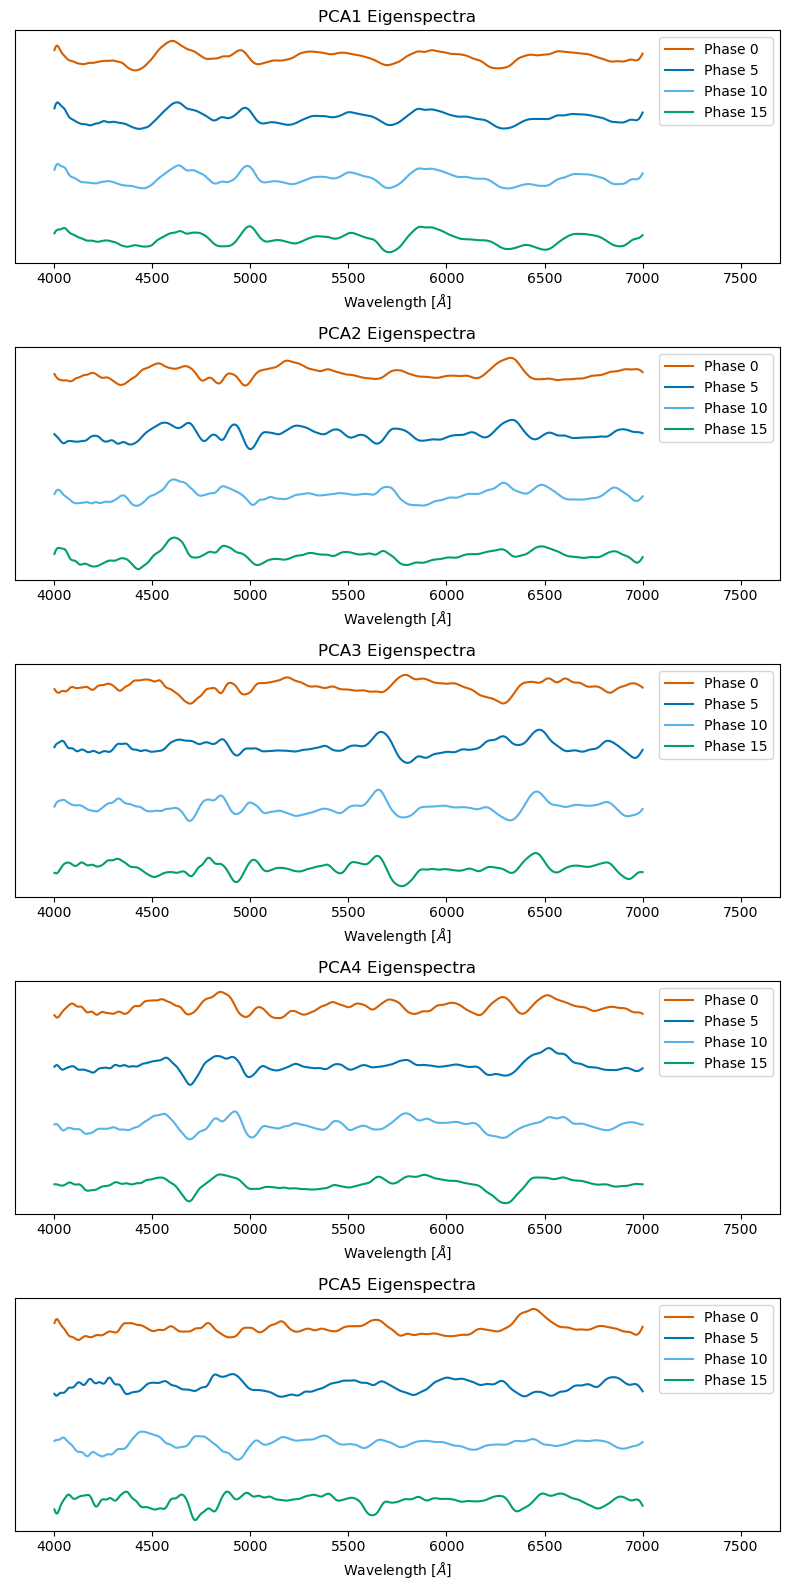

In [44]:
# Each panel shows one of the first 5 eigenspectra in each of phase ranges (0, 5, 10, 15 +/- 5)
fig, axs = plt.subplots(5, 1, figsize = (8,16))
for i in range(5):
    ax = axs[i]
    ax.set_title(f"PCA{i+1} Eigenspectra")
    ax.set_xlim(3800,7700)
    ax.set_xlabel(r"Wavelength [$\AA$]")
    ax.set_yticks([])
    ax.plot(snidPCA0.wavelengths, snidPCA0.evecs[i] + 2 - 0, 'r', label = "Phase 0")
    ax.plot(snidPCA5.wavelengths, snidPCA5.evecs[i] + 2 - 0.5, 'b', label = "Phase 5")
    ax.plot(snidPCA10.wavelengths, snidPCA10.evecs[i] + 2 - 1, 'c', label = "Phase 10")
    ax.plot(snidPCA15.wavelengths, snidPCA15.evecs[i] + 2 - 1.5, 'g', label = "Phase 15")

    ax.legend()

fig.tight_layout()
#plt.savefig("/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/Final_Plots/5_Eigenspectra_ALL_PHASES.jpeg", dpi = 300)


# Figure 2) Plot Variance captured as a function of number of Eigenspectra for each phase range

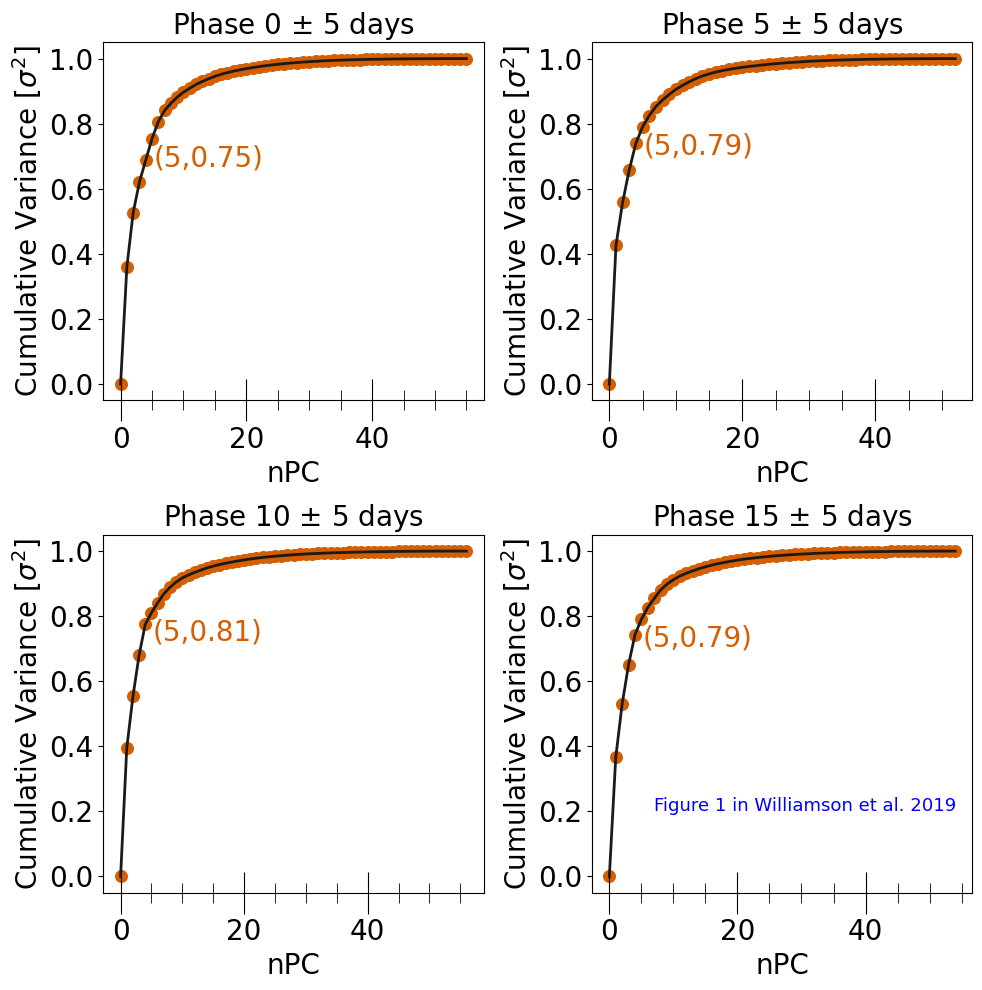

In [101]:
# Plot variance captured as a function of phase range
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10,10))

fig_place = [ax1, ax2, ax3, ax4]
phases = [snidPCA0, snidPCA5, snidPCA10, snidPCA15]
phase_num = 0
for (i, phases) in zip(fig_place, phases):
    ax = i

    xcumsum = np.arange(len(phases.evals_cs)+1)
    ycumsum = np.hstack((np.array([0]), phases.evals_cs))
    axs[0,0].plot(xcumsum, ycumsum, linewidth=4.0,c='k')
    ax.scatter(xcumsum, ycumsum, s=70, c='r')
    ax.plot(xcumsum, ycumsum, linewidth = 2, c= 'k')

    ax.set_title(f"Phase {phase_num} $\pm$ 5 days", fontsize = 20)
    ax.text(5.2,phases.evals_cs[4]-.085,'(5,%.2f)'%(phases.evals_cs[4]),fontsize=20,color='r')
    if phases == snidPCA15:
        ax.text(7,0.2,f'Figure 1 in Williamson et al. 2019',fontsize=13,color='blue')
    else: 
        pass
    ax.set_ylabel('Cumulative Variance '+'[$\sigma^{2}$]', fontsize=20)
    ax.set_xlabel('nPC', fontsize=20)
    ax.tick_params(axis='both',which='both',labelsize=30-10)
    ax.tick_params(axis='x', length=30, direction='inout')
    ax.tick_params(axis='x', which='minor', length=15, direction='inout')
    ax.xaxis.set_minor_locator(MultipleLocator(5))

    phase_num += 5

fig.tight_layout()
#plt.savefig("/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/Final_Plots/Variance_Captured_Phase.jpeg", dpi = 300)

# Figure 1) Continuum-Divided (i.e. Mean Spectra) of SNID Template Spectra for SNe 1998dt - Example

In [3]:
sn98 = SNIDsn.SNIDsn()
sn98.loadSNIDlnw('/Users/hannamag/Desktop/SESNspectraPCA/code/Tutorial_Data/sn1998dt.lnw')

In [14]:
sn08 = SNIDsn.SNIDsn()
sn08.loadSNIDlnw('/Users/hannamag/Desktop/SESNspectraPCA/code/Tutorial_Data/sn2008ax.lnw')

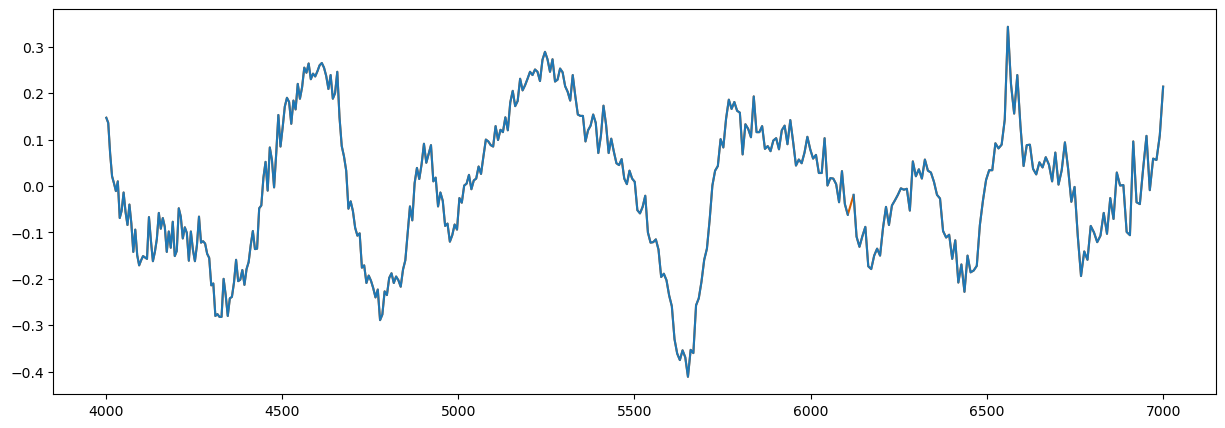

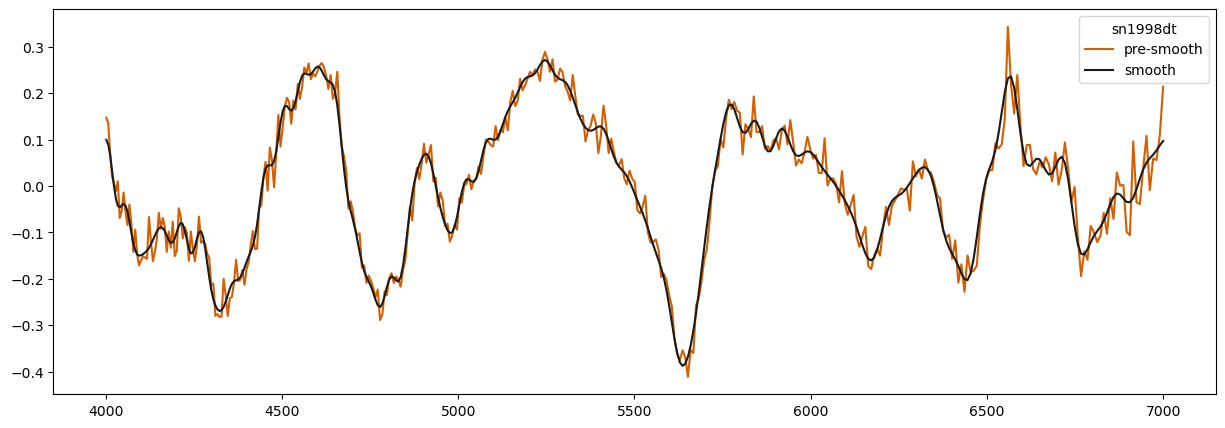

In [4]:
# Example interpolation to smooth function and fill out gaps in wavelength
sn98.wavelengthFilter(wvlmin=4000, wvlmax=7000)
sn98.snidNAN()
f = sn98.interp1dSpec('Ph1.8', 4000, 7000, True)
f1 = sn98.smoothSpectrum('Ph1.8', velcut=1000, plot=True)

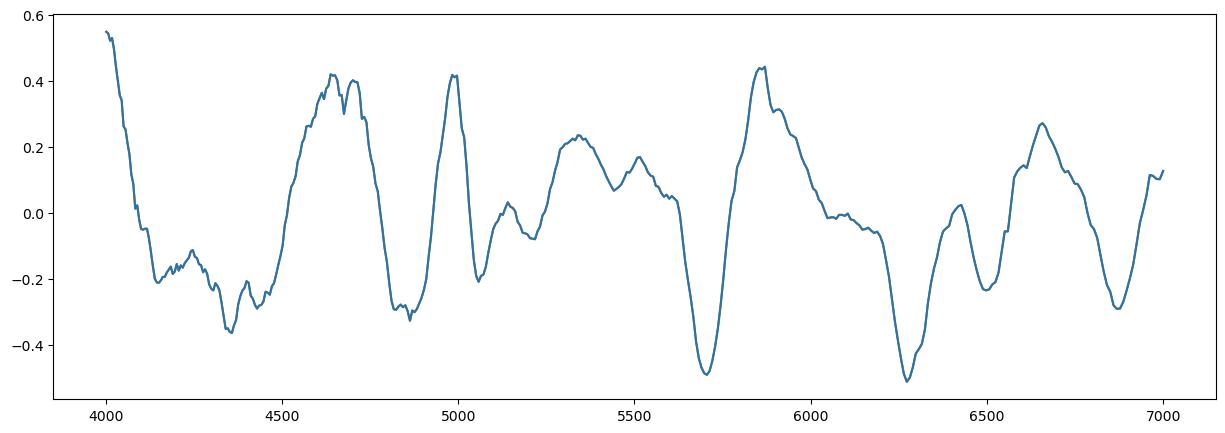

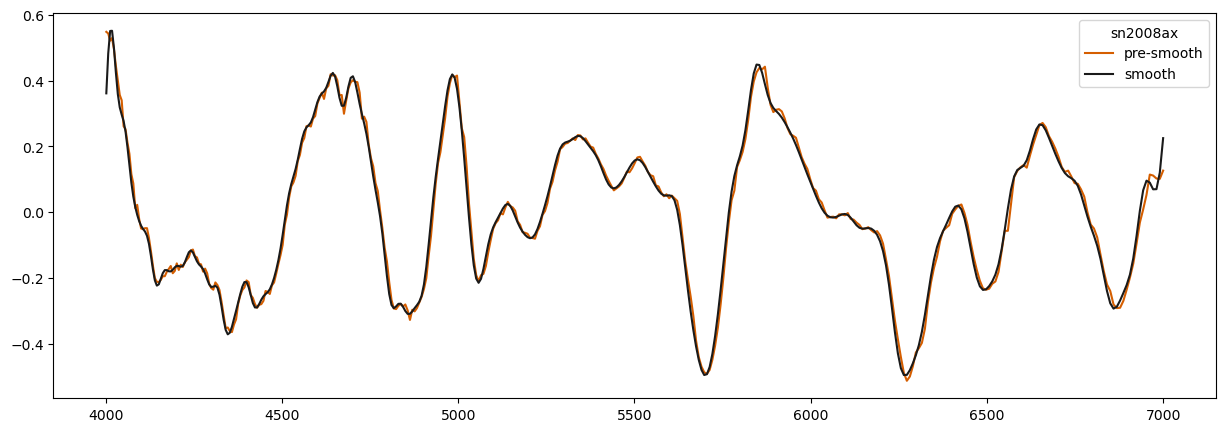

In [22]:
# Example interpolation to smooth function and fill out gaps in wavelength
sn08.wavelengthFilter(wvlmin=4000, wvlmax=7000)
sn08.snidNAN()

f = sn08.interp1dSpec('Ph6.0', 4000, 7000, True)
f1 = sn08.smoothSpectrum('Ph6.0', velcut=1000, plot=True)


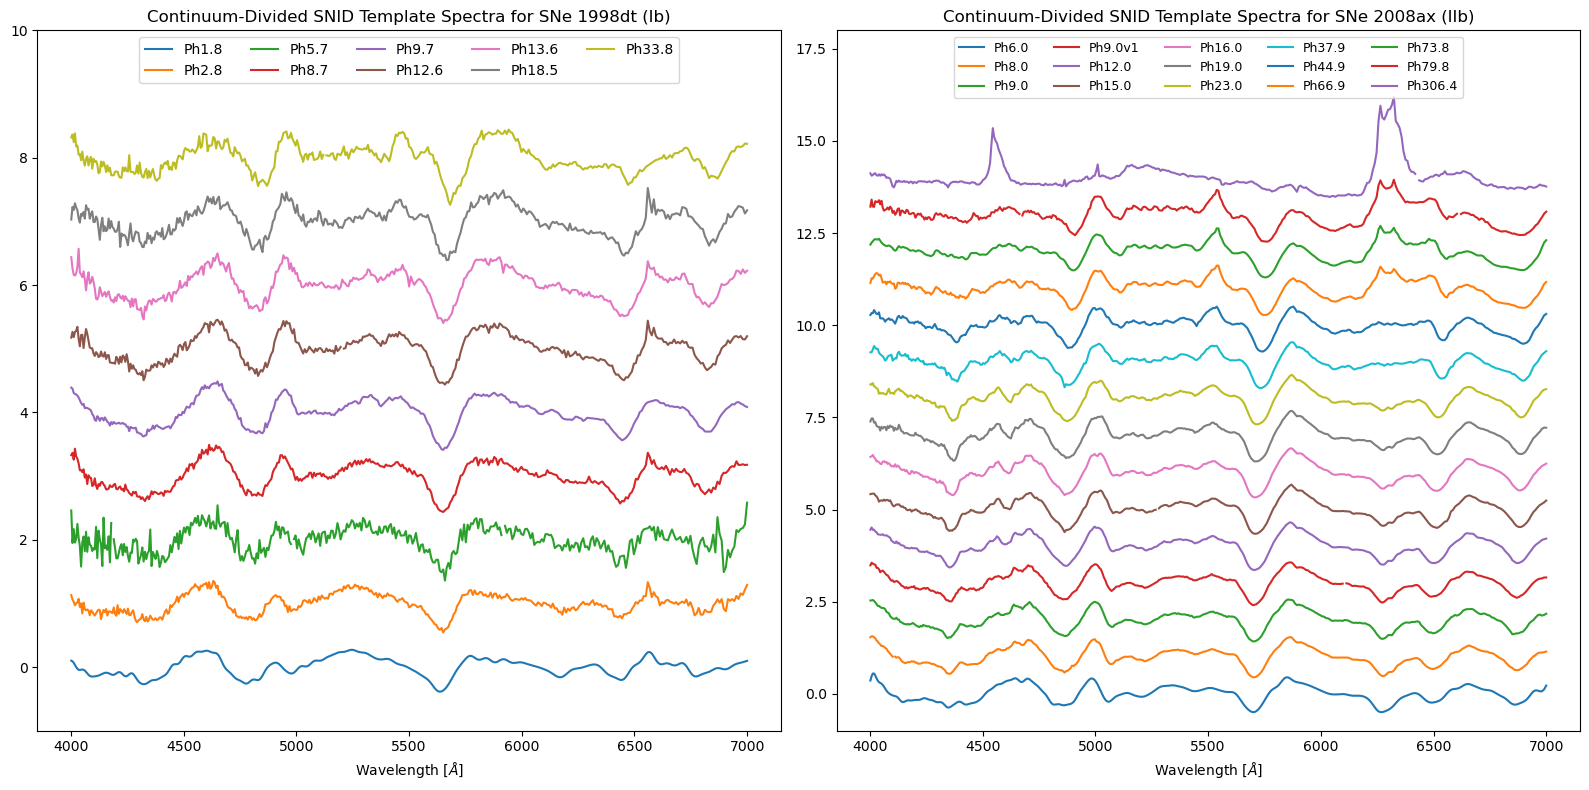

In [59]:
# Plot all 9 phases of SN98 spectra - Ib normal
fig, ax = plt.subplots(1, 2, figsize = (16,8))
ax[0].set_title("Continuum-Divided SNID Template Spectra for SNe 1998dt (Ib)")
ax[1].set_title("Continuum-Divided SNID Template Spectra for SNe 2008ax (IIb)")
ax[0].set_xlabel(r"Wavelength [$\AA$]")
ax[1].set_xlabel(r"Wavelength [$\AA$]")
ax[0].set_ylim(-1, top = 10)
ax[1].set_ylim(-1, top = 18)

# SN1998dt
count = 0
colnames = sn98.getSNCols()
for phase in colnames:
    ax[0].plot(sn98.wavelengths, sn98.data[phase] + count, label = f"{phase}")
    count += 1

#ax[0].axvline(5876, ls = '--', color = 'black')
ax[0].legend(ncol = len(colnames) - 4, loc = 'upper center')

# SN2008ax - yes to hydrogen
count = 0
colnames = sn08.getSNCols()
for phase in colnames[11:]:
    ax[1].plot(sn98.wavelengths, sn08.data[phase] + count, label = f"{phase}")
    count += 1

#ax[1].axvline(4861, ls = '--', color = 'black')
#ax[1].axvline(6563, ls = '--', color = 'black')
ax[1].legend(ncol = len(colnames) - 21, loc = 'upper center', fontsize = 9)

fig.tight_layout()

#plt.savefig("/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/Final_Plots/Mean_Spectra_Visual_Double.jpeg", dpi = 300)

# Figure 2) Example Plot of Supernovae captured with more and more principal components

/Users/hannamag/opt/anaconda3/envs/sesn/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



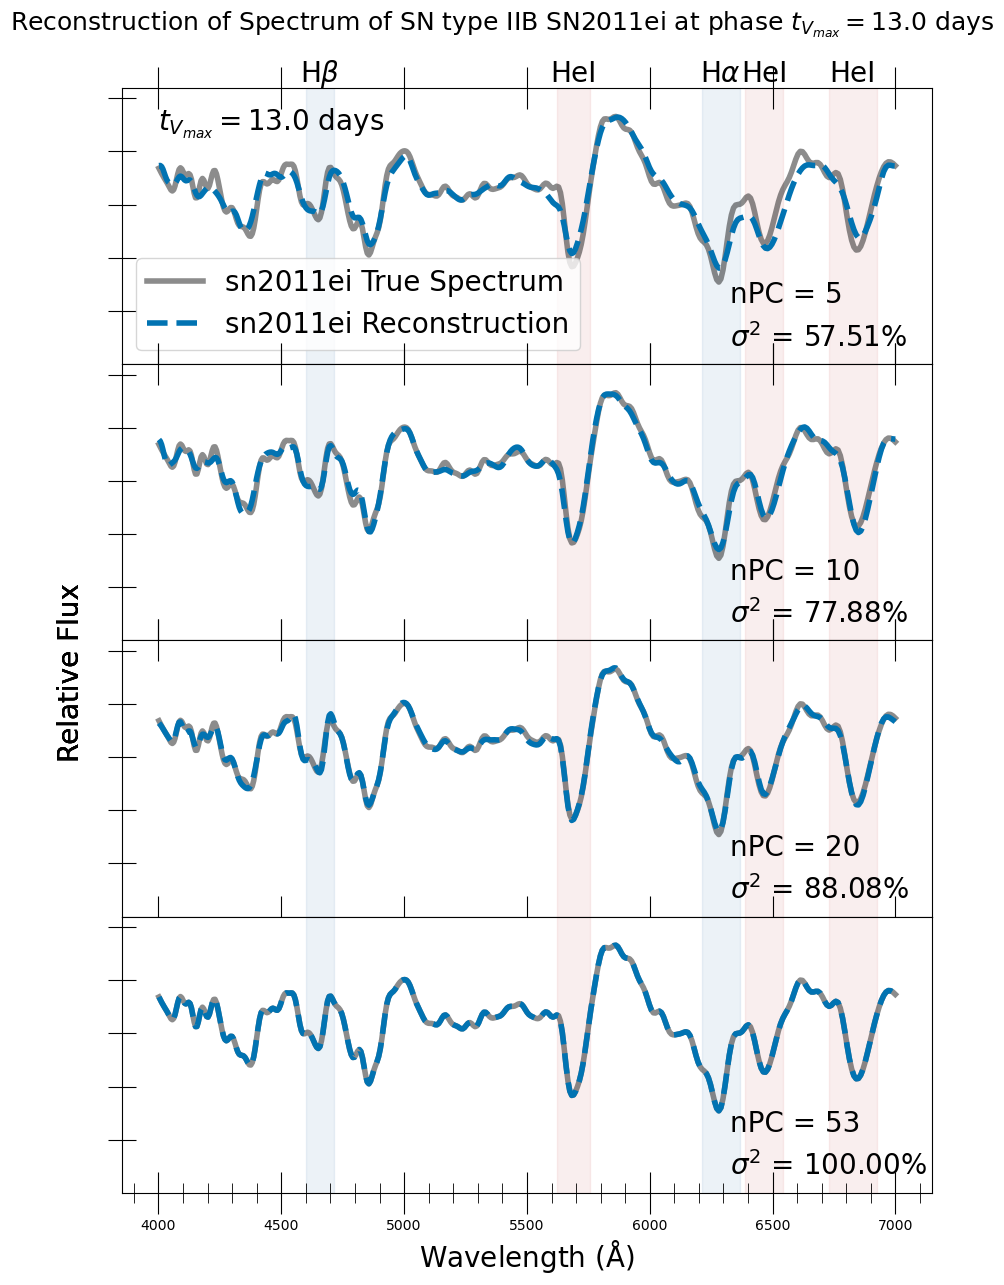

In [125]:
# Reconstruction of Original Spectra in our SNID Dataset - sn2011ei & sn2005hg
sn05 = dataset15['sn2005hg']

f, h = snidPCA15.reconstructSpectrumGrid((10, 13), 'sn2011ei', 'Ph13.0', 3, [5, 10, 20, 53], fontsize = 20, leg_fontsize= 20, ylim = (-1.6, 1), dytick = 0.5)
f.suptitle(r"Reconstruction of Spectrum of SN type IIB SN2011ei at phase $t_{V_{max}} = 13.0$ days", fontsize = 18, y = 1.01)
a = f.axes[0]
a.text(4000, 0.6,'$t_{V_{max}}=13.0$ days', fontsize=20)


a = f.axes[-1]
from matplotlib.ticker import MultipleLocator
a.xaxis.set_minor_locator(MultipleLocator(100))

f.tight_layout()

/Users/hannamag/opt/anaconda3/envs/sesn/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



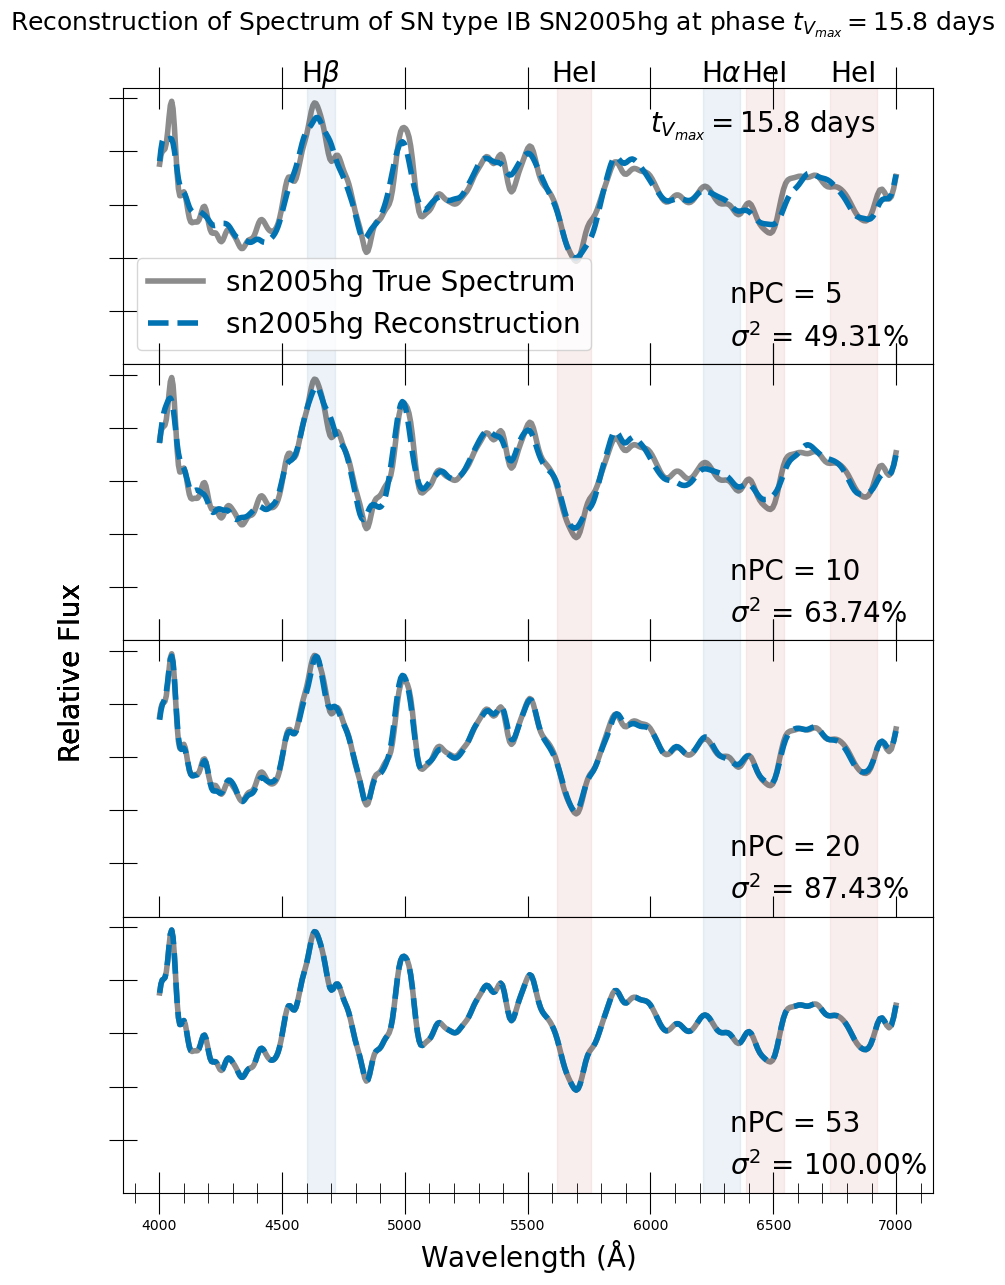

In [127]:

f, h = snidPCA15.reconstructSpectrumGrid((10, 13), 'sn2005hg', 'Ph15.8', 3, [5, 10, 20, 53], fontsize = 20, leg_fontsize= 20, ylim = (-1.6, 1), dytick = 0.5)
f.suptitle(r"Reconstruction of Spectrum of SN type IB SN2005hg at phase $t_{V_{max}} = 15.8$ days", fontsize = 18, y = 1.01)
a = f.axes[0]
a.text(6000, 0.58,'$t_{V_{max}}=15.8$ days', fontsize=20)



a = f.axes[-1]
from matplotlib.ticker import MultipleLocator
a.xaxis.set_minor_locator(MultipleLocator(100))

f.tight_layout()
#plt.savefig("/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/Final_Plots/2005hg_reconstruction.jpeg", dpi = 300)

# Figure 3) Eigenspectra vs Mean spectra of 4 subclasses

In [129]:
# # PC's vs Mean Templates

from scipy.io.idl import readsav
import pylab as pl
import numpy as np
import os

In [131]:
meanspec_path = "/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/Data_Mean_Spec"

def readtemplate(tp):
    if tp=='IcBL' or tp=='Ic':
        s = readsav(meanspec_path + '/meanspec%s_1specperSN_15_ft.sav'%tp)
    else:
        s = readsav(meanspec_path + '/meanspec%s_1specperSN_15.sav'%tp)
    
    return s


def plotPCs(s, tp, c, ax, eig, ewav, sgn):
    lines = []
    for i,e in enumerate(eig):
        line = ax.plot(ewav, sgn[i]*2*e +5-1.0*i, label="PCA%i"%i,c='k')
        lines.append(line)
        if i:
            ax.fill_between(s.wlog, s.fmean + s.fsdev+ 5-1.0*i,
                            s.fmean - s.fsdev +5-1.0*i, 
                    color = c, alpha = 0.2)
        else:
            ax.fill_between(s.wlog, s.fmean + s.fsdev +5-1.0*i,
                            s.fmean - s.fsdev +5-1.0*i, 
                    color = c, alpha = 0.2, label=tp+' Template')
            
    ax.set_xlim(4000,7000)
    ax.set_xlabel("wavelength ($\AA$)",fontsize=26)
    ax.set_ylim(0, 8)
    return ax, lines

plt.clf()
snIb = readtemplate('Ib')
snIc = readtemplate('Ic')
snIIb = readtemplate('IIb')
snIcBL = readtemplate('IcBL')


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

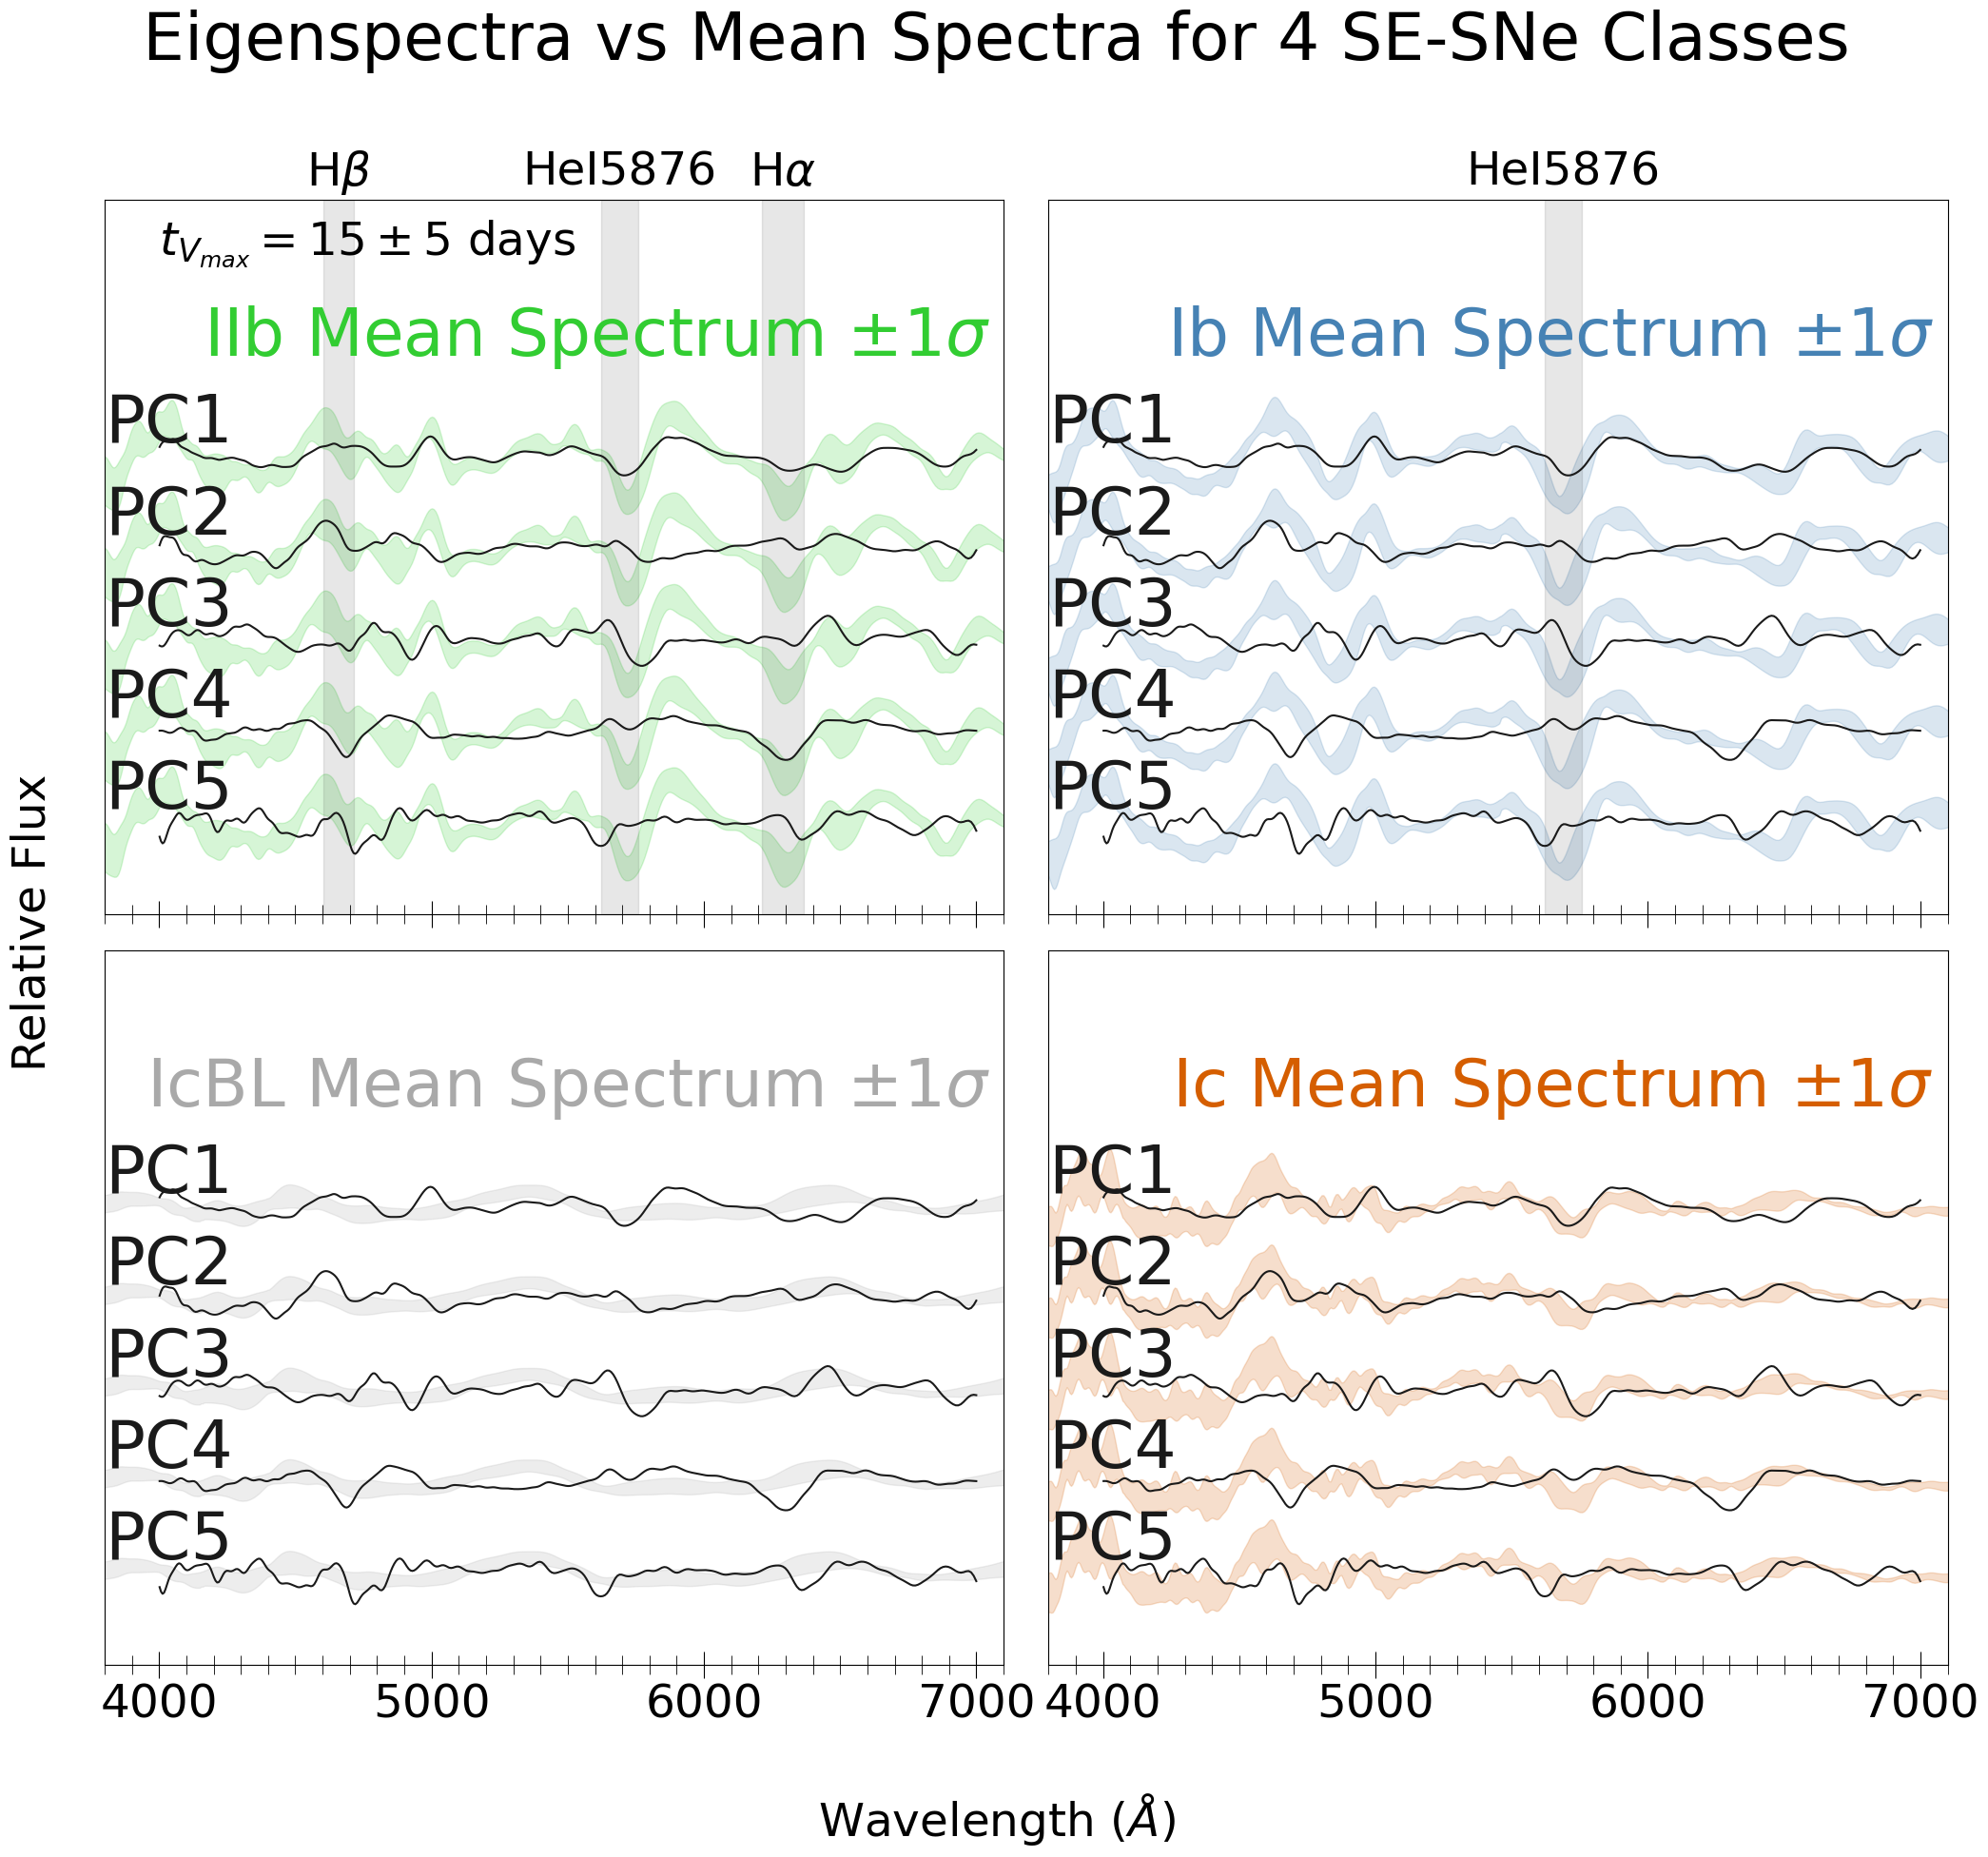

In [138]:
import matplotlib.patches as mpatches
plt.clf()
f, axs = plt.subplots(2,2,figsize=(25,20), sharex=True, sharey=True)
f.suptitle("Eigenspectra vs Mean Spectra for 4 SE-SNe Classes", fontsize = 50)

plt.subplots_adjust(hspace=0.05, wspace=0.05)
axs[0,0], _ = plotPCs(snIIb, 'IIb',snidPCA15.IIb_color, axs[0,0], snidPCA15.evecs[0:5], snidPCA0.wavelengths,[1,1,1,1,1])
axs[0,1], _ = plotPCs(snIb, 'Ib',snidPCA15.Ib_color, axs[0,1], snidPCA15.evecs[0:5], snidPCA0.wavelengths,[1,1,1,1,1])
axs[1,0], _ = plotPCs(snIcBL, 'IcBL',snidPCA15.IcBL_color, axs[1,0], snidPCA15.evecs[0:5], snidPCA0.wavelengths,[1,1,1,1,1])
axs[1,1], lines = plotPCs(snIc, 'Ic',snidPCA15.Ic_color, axs[1,1], snidPCA15.evecs[0:5], snidPCA0.wavelengths,[1,1,1,1,1])
leg = [el[0] for el in lines]
red_patch = mpatches.Patch(color='steelblue', label='Ib Mean Spec', alpha=0.1)
green_patch = mpatches.Patch(color='limegreen', label='IIb Mean Spec', alpha=0.1)
black_patch = mpatches.Patch(color='darkgrey', label='IcBL Mean Spec', alpha=0.1)
blue_patch = mpatches.Patch(color='r', label='Ic Mean Spec', alpha=0.1)
leg.append(green_patch)
leg.append(black_patch)
leg.append(red_patch)
leg.append(blue_patch)



ymax = 7.8
xmin = 3800

fontsz=35
axs[0,0].set_ylim((0,ymax))
axs[0,0].set_xlabel('')
axs[0,1].set_xlabel('')



ax = axs[0,0]
ax.axvspan(6213, 6366, alpha=0.1, color='k') #H alpha -9000 km/s to -16000 km/s
s = r'$\alpha$'
ax.text((6213+6366)/2.0, ymax + ymax * 0.02, 'H'+s, fontsize=fontsz, horizontalalignment='center')
ax.axvspan(4602, 4715, alpha=0.1, color='k') #H Beta -9000 km/s to-16000 km/s
s = r'$\beta$'
ax.text((4602+4715)/2.0, ymax + ymax * 0.02, 'H'+s, fontsize=fontsz, horizontalalignment='center')
ax.axvspan(5621, 5758, alpha=0.1, color='k') #HeI5876 -6000 km/s to -13000 km/s
ax.text((5621+5758)/2.0, ymax + ymax * 0.02, 'HeI5876', fontsize=fontsz, horizontalalignment='center')

ax = axs[0,1]
ax.axvspan(5621, 5758, alpha=0.1, color='k') #HeI5876 -6000 km/s to -13000 km/s
ax.text((5621+5758)/2.0, ymax + ymax * 0.02, 'HeI5876', fontsize=fontsz, horizontalalignment='center')


axs[0,0].tick_params(axis='both',which='both',labelsize=fontsz, length=20,direction='inout')
axs[0,0].get_yaxis().set_ticks([])
axs[0,1].tick_params(axis='both',which='both',labelsize=fontsz, length=20,direction='inout')
axs[1,0].tick_params(axis='both',which='both',labelsize=fontsz, length=20,direction='inout')
axs[1,0].get_yaxis().set_ticks([])
axs[1,1].tick_params(axis='both',which='both',labelsize=fontsz, length=20,direction='inout')


axs[0,0].set_ylim((0,ymax))
axs[0,0].set_xlim((xmin, 7100))
axs[1,0].set_xlim((xmin,7100))
axs[1,0].set_xlabel('')
axs[1,1].set_xlabel('')


f.text(0.085, 2.0/4.0, 'Relative Flux', verticalalignment='center', rotation='vertical', fontsize=fontsz)
xmax = axs[0,0].get_xlim()[1]

f.text(0.5,0.02, 'Wavelength $(\AA)$', horizontalalignment='center', fontsize=fontsz)

for ax in axs.flatten():
    ax.text(xmin, 5.15, 'PC1', fontsize=50, color='k')
    ax.text(xmin, 4.15, 'PC2', fontsize=50, color='k')
    ax.text(xmin, 3.15, 'PC3', fontsize=50, color='k')
    ax.text(xmin, 2.15, 'PC4', fontsize=50, color='k')
    ax.text(xmin, 1.15, 'PC5', fontsize=50, color='k')
    from matplotlib.ticker import MultipleLocator
    ax.xaxis.set_minor_locator(MultipleLocator(100))
    ax.tick_params(axis='x', which='minor', direction='inout', length=15)
    
axs[0,0].text(xmax-50, ymax-1.7, 'IIb Mean Spectrum $\pm 1\sigma$', fontsize=50, color='limegreen', ha='right')
axs[0,1].text(xmax-50, ymax-1.7, 'Ib Mean Spectrum $\pm 1\sigma$', fontsize=50, color='steelblue', ha='right')
axs[1,0].text(xmax-50, ymax-1.7, 'IcBL Mean Spectrum $\pm 1\sigma$', fontsize=50, color='darkgrey', ha='right')
axs[1,1].text(xmax-50, ymax-1.7, 'Ic Mean Spectrum $\pm 1\sigma$', fontsize=50, color='r', ha='right')



axs[0,0].text(4000,7.2,'$t_{V_{max}}=15\pm5$ days',fontsize=35)

#plt.savefig("/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/Final_Plots/Figure6_Eigen_Mean.jpeg", dpi = 300)


# Figure 4) Change in eigenspectra order 

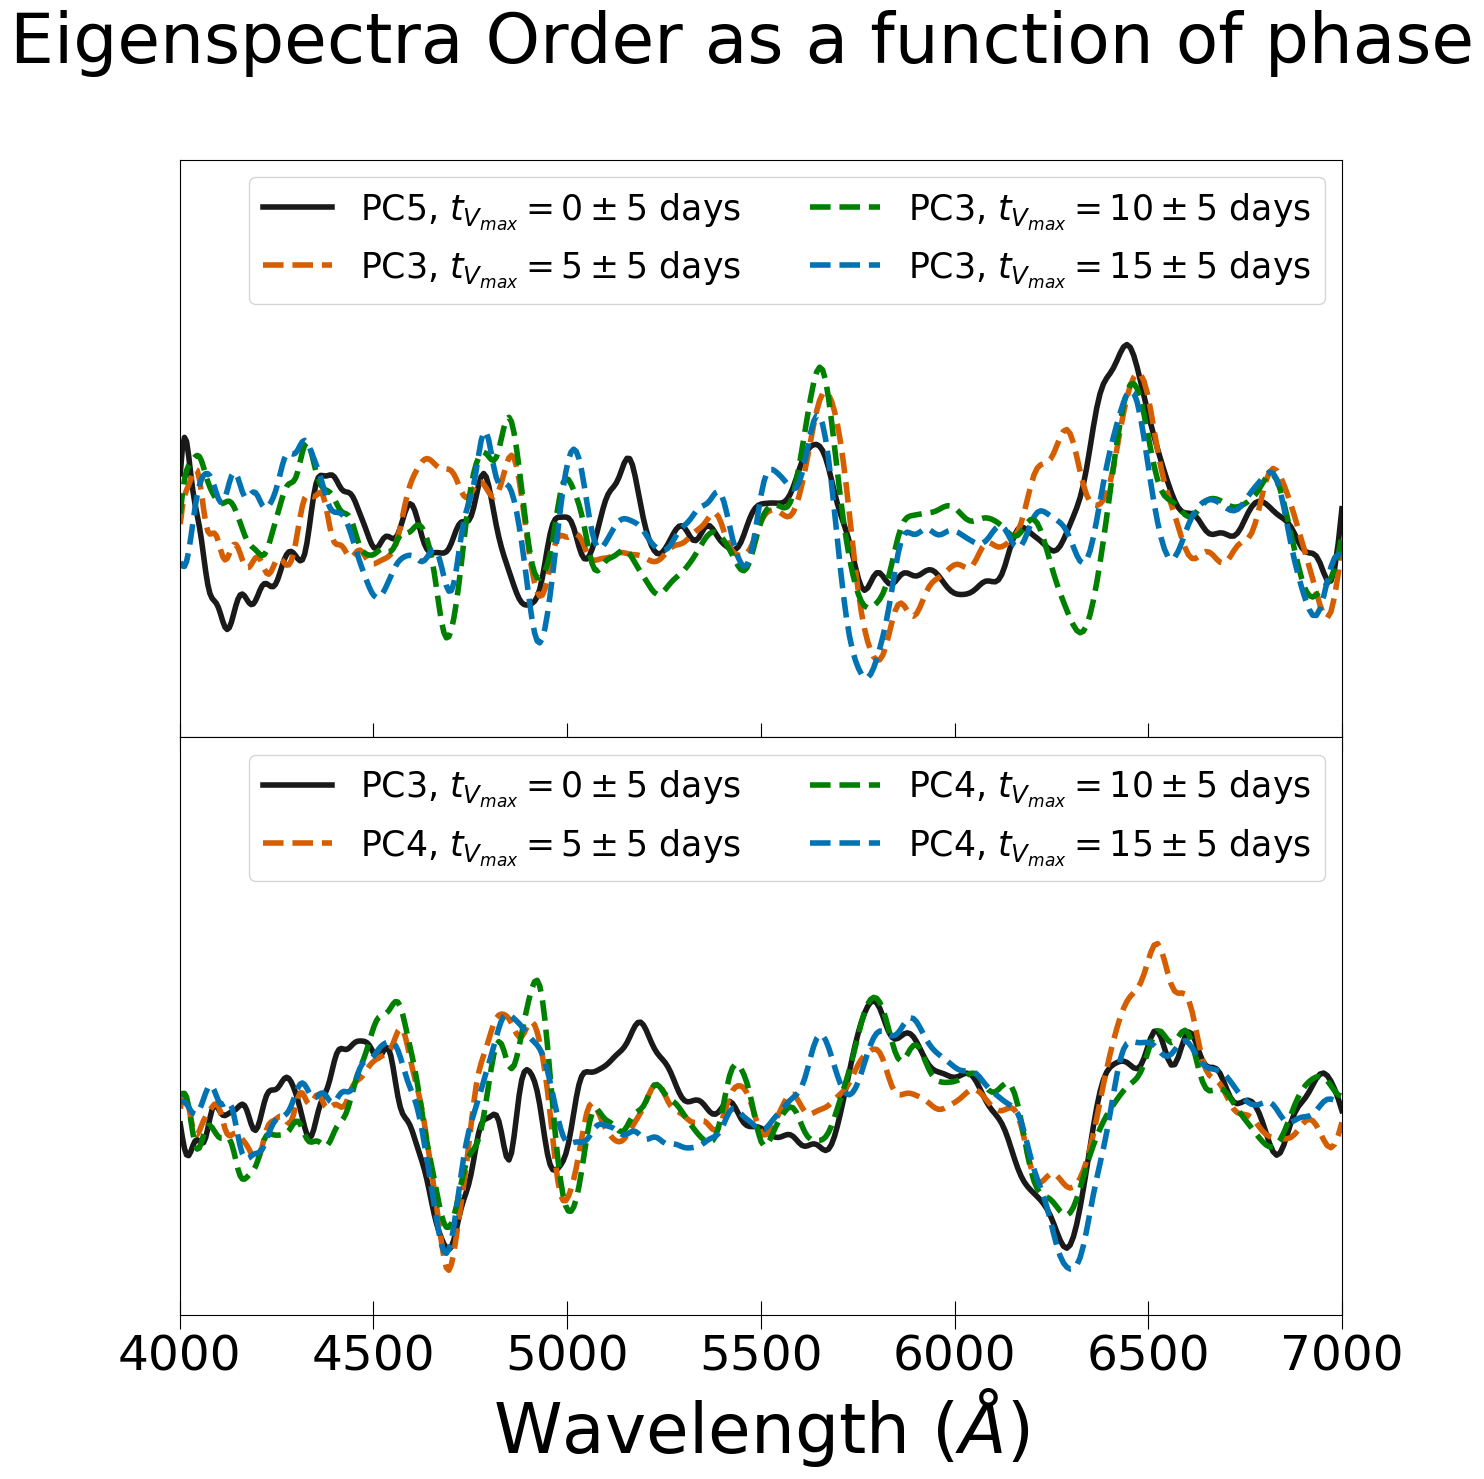

In [143]:
# # PC Time Evolution

# The following cells construct a plot that shows the time evolution of the eigenspectra as phase changes.

f_all, axs = plt.subplots(2,1,figsize=(15,15),gridspec_kw={'hspace':0})
f_all.suptitle("Eigenspectra Order as a function of phase", fontsize = 50)

ax = axs[0]
ax.set_xlim((4000,7000))
ax.set_ylim((-.2,.35))

l1=ax.plot(snidPCA0.wavelengths,snidPCA0.evecs[4]+0.0,color='k',linewidth=4.0, label='PC5, $t_{V_{max}}=0\pm5$ days')
l2=ax.plot(snidPCA5.wavelengths, snidPCA5.evecs[2]+0.0,'--',color='r',linewidth=4.0, label='PC3, $t_{V_{max}}=5\pm5$ days')
l3=ax.plot(snidPCA5.wavelengths, snidPCA10.evecs[2]+0.0,'--',color='green',linewidth=4.0, label='PC3, $t_{V_{max}}=10\pm5$ days')
l4=ax.plot(snidPCA5.wavelengths, snidPCA15.evecs[2]+0.0,'--',color='b',linewidth=4.0, label='PC3, $t_{V_{max}}=15\pm5$ days')

ax.legend(handles=[l1[0],l2[0],l3[0],l4[0]],fontsize=25, ncol=2)
ax.tick_params(axis='both',which='major', length=20,direction='inout',labelsize=35)
ax.tick_params(axis='both',which='minor', length=10,direction='inout')
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])


ax = axs[1]
ax.set_xlim((4000,7000))
ax.set_ylim((-.2,.35))

l1=ax.plot(snidPCA0.wavelengths,snidPCA0.evecs[2]+0.0,color='k',linewidth=4.0, label='PC3, $t_{V_{max}}=0\pm5$ days')
l2=ax.plot(snidPCA5.wavelengths, snidPCA5.evecs[3]+0.0,'--',color='r',linewidth=4.0, label='PC4, $t_{V_{max}}=5\pm5$ days')
l3=ax.plot(snidPCA5.wavelengths, snidPCA10.evecs[3]+0.0,'--',color='green',linewidth=4.0, label='PC4, $t_{V_{max}}=10\pm5$ days')
l4=ax.plot(snidPCA5.wavelengths, snidPCA15.evecs[3]+0.0,'--',color='b',linewidth=4.0, label='PC4, $t_{V_{max}}=15\pm5$ days')

ax.legend(handles=[l1[0],l2[0],l3[0],l4[0]],fontsize=25,ncol=2)
ax.set_xlabel('Wavelength ($\AA$)',fontsize=50)
ax.tick_params(axis='both',which='major', length=20,direction='inout',labelsize=35)
ax.tick_params(axis='x',which='minor', length=10,direction='inout')
ax.set_yticks([])
ax.set_yticklabels([])

#plt.savefig("/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/Final_Plots/Figure7_Eigen_Order.jpeg", dpi = 300)

# Figure 5) Classification Algorithm Results

['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 

/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/SNePCA.py:728: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/SNePCA.py:730: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/SNePCA.py:732: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/SNePCA.py:734: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



['limegreen', 'steelblue', 'r', 'darkgrey']
['steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/hannamag/opt/anaconda3/envs/sesn/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 

/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/SNePCA.py:728: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/SNePCA.py:730: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/SNePCA.py:732: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/SNePCA.py:734: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey'

/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/SNePCA.py:728: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/SNePCA.py:730: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/SNePCA.py:732: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/SNePCA.py:734: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 

/Users/hannamag/opt/anaconda3/envs/sesn/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/hannamag/opt/anaconda3/envs/sesn/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']
['limegreen', 'steelblue', 'r', 'darkgrey']


/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/SNePCA.py:728: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/SNePCA.py:730: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/SNePCA.py:732: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/SNePCA.py:734: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



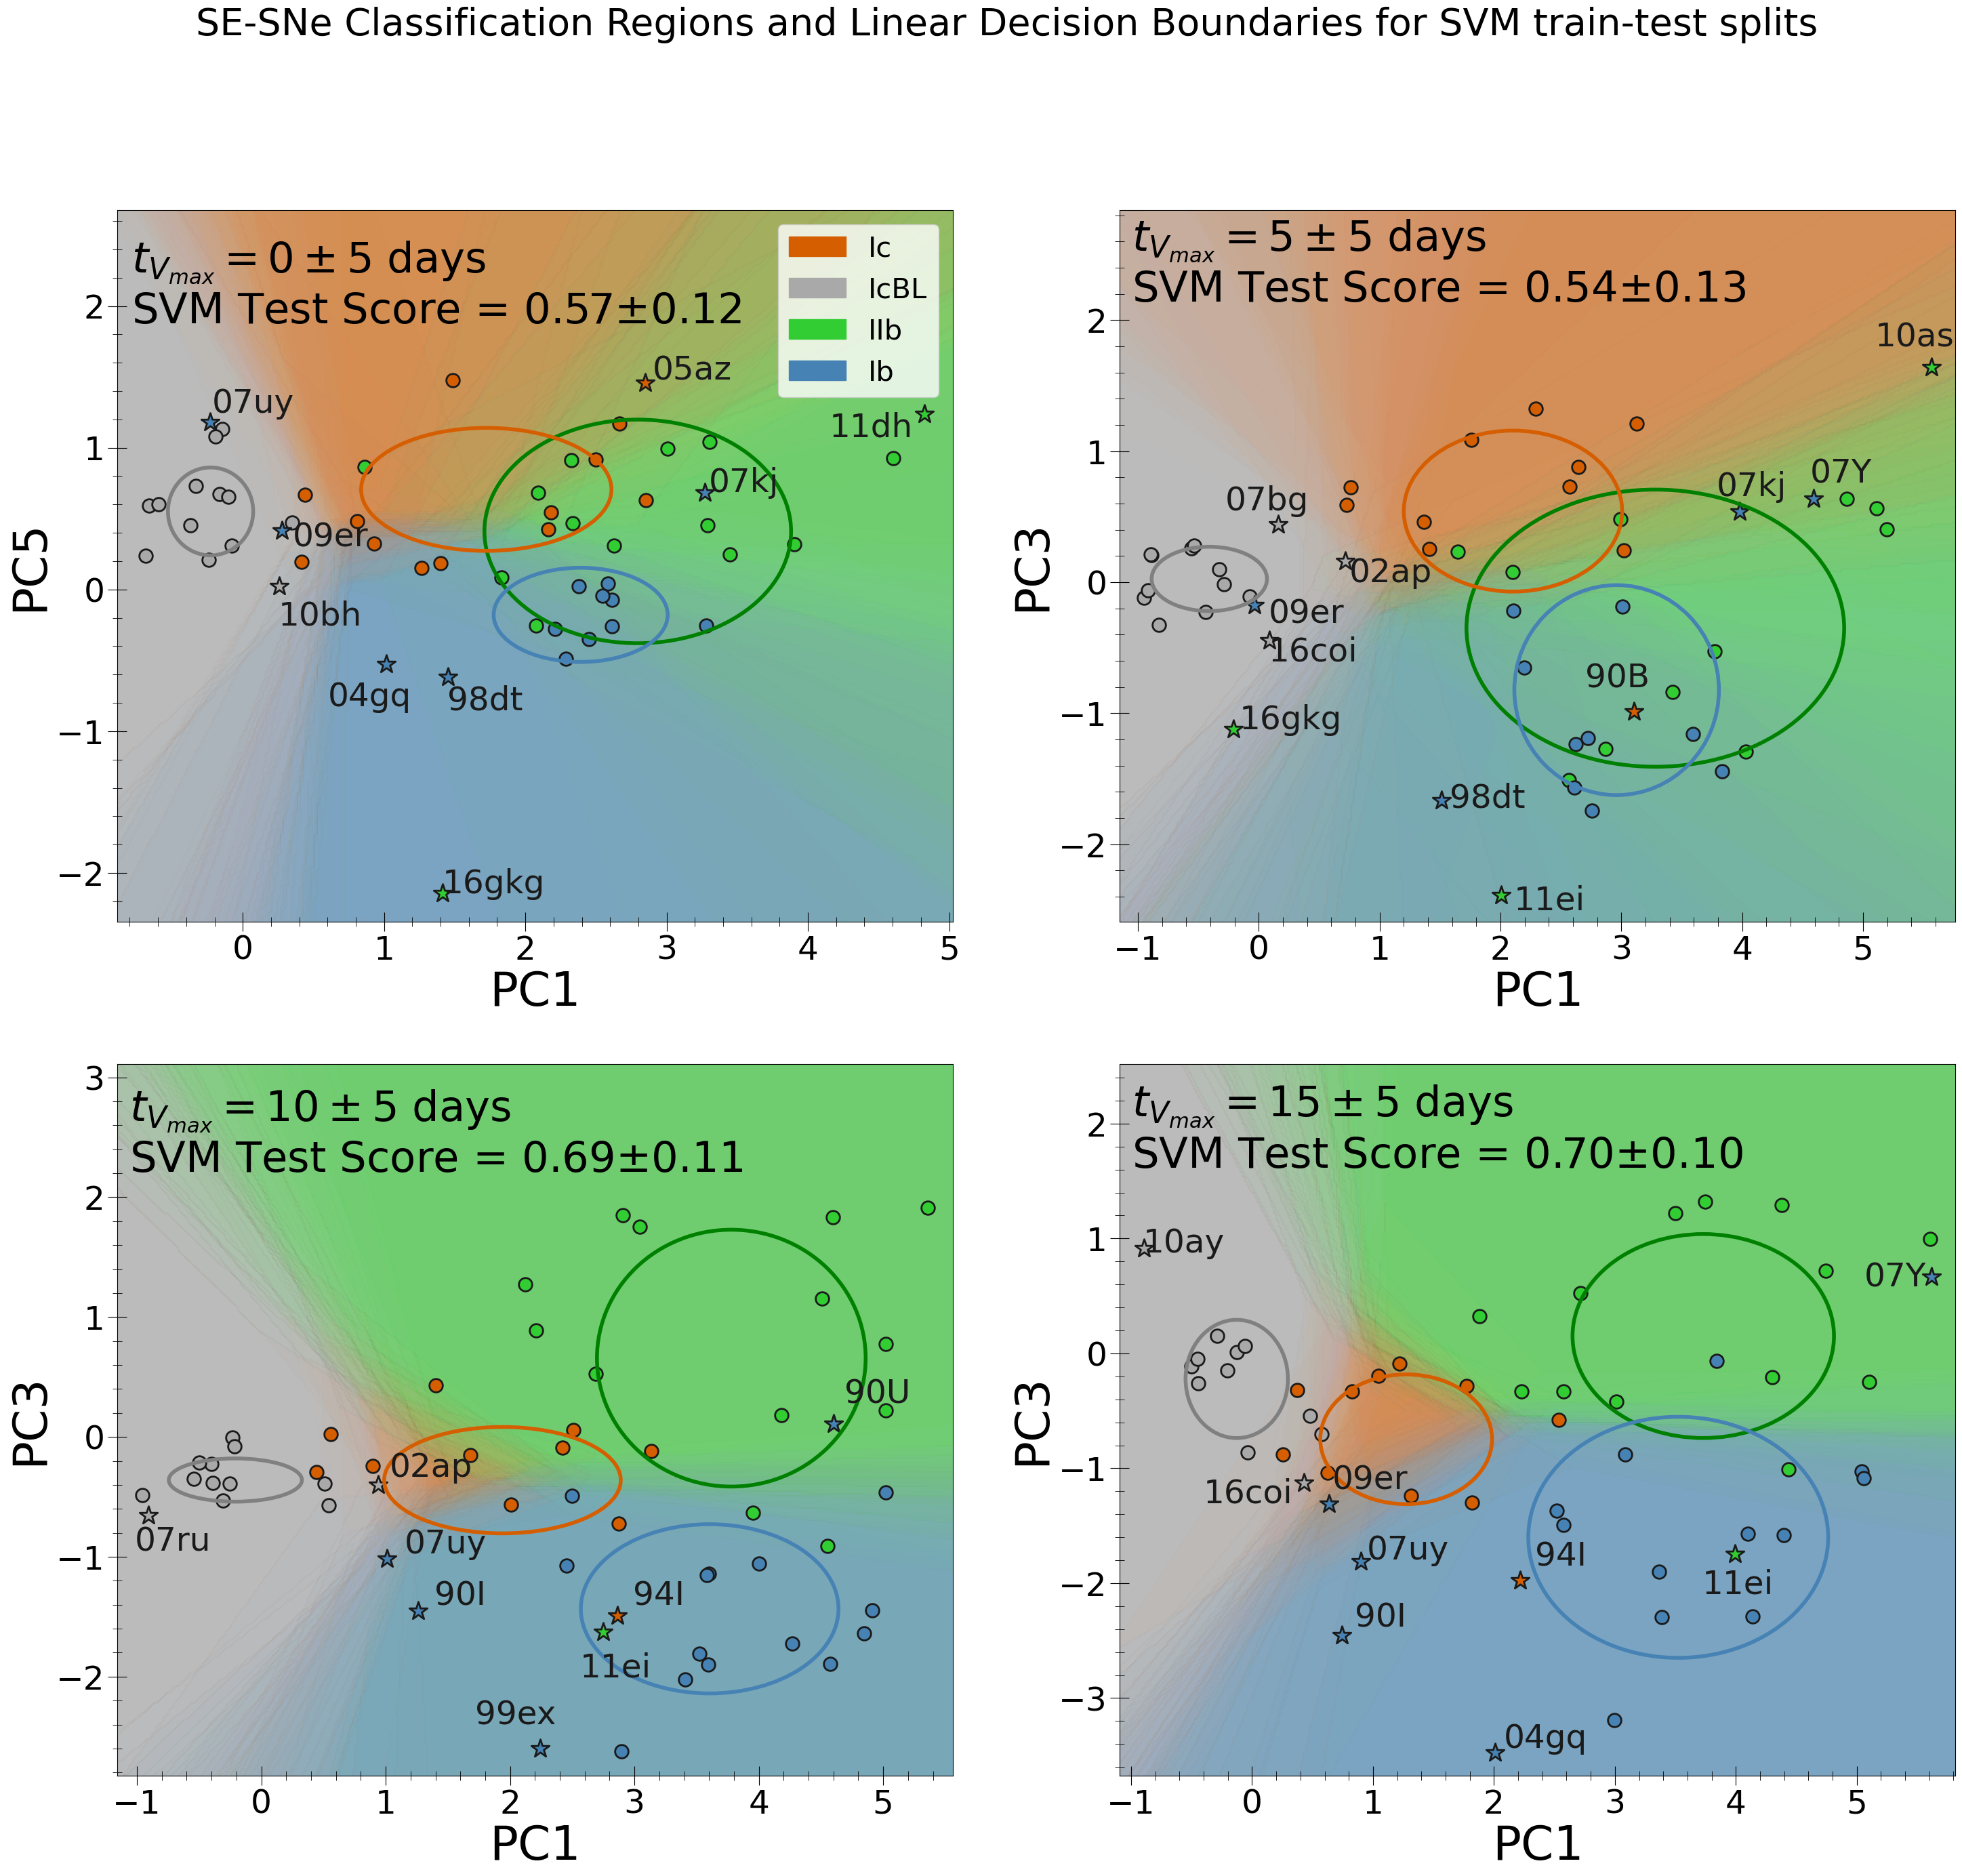

In [146]:

# # Classification

# The following cells construct a 4 panel plot, where each panel corresponds to a 2D projection of PCA space in a different phase range.


f_all, axs = plt.subplots(2,2,figsize=(35,30),gridspec_kw={'wspace':.2,'hspace':.2})
f_all.suptitle("SE-SNe Classification Regions and Linear Decision Boundaries for SVM train-test splits", fontsize = 40)


#Exclude Ib-pec and Ic-pec SNe
exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']



svmsc=[]
f_all,svmsc,av0,std0=snidPCA0.pcaPlot(1,5,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True,
                                     excludeSNe=exclude, std_rad=1.0, svm=True, count=3, fig=f_all,
                                     ax=f_all.axes[0],ncv=50, markOutliers=True)



svmsc=[]
f_all,svmsc, av5, std5=snidPCA5.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True, 
                                       excludeSNe=exclude,std_rad=1.0, svm=True, count=3, 
                                       fig=f_all, ax=f_all.axes[1], ncv=50, markOutliers=True)



svmsc=[]
f_all,svmsc, av10, std10=snidPCA10.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                          count=3, fig=f_all, ax=f_all.axes[2],ncv=50, markOutliers=True)

svmsc=[]
f_all,svmsc, av15, std15=snidPCA15.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True, excludeSNe=exclude,std_rad=1.0,
                                          svm=True, count=3, fig=f_all, ax=f_all.axes[3],ncv=50, markOutliers=True)




for i,ax in enumerate(f_all.axes):
    l = ax.get_legend()
    t = l.get_title()
    t.set_fontsize(30)
    ax.tick_params(axis='both',which='major', length=20,direction='inout',labelsize=35)
    ax.tick_params(axis='both',which='minor', length=10,direction='inout')
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    if i==0:
        l = ax.get_legend()
        t = l.get_title()
        l.set_title('')
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .3,'$t_{V_{max}} = 0 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av0,std0),fontsize=45)
        ax.set_ylabel('PC5', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
    elif i==1:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .2,'$t_{V_{max}} = 5 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av5,std5),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()
    elif i==2:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .4,'$t_{V_{max}} = 10 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av10,std10),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()
    else:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .4,'$t_{V_{max}} = 15 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av15,std15),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()



#IIb 2std outliers:  ['sn2016gkg' 'sn2011dh']
#Ib 2std outliers:  ['sn2004gq' 'sn2007uy' 'sn1998dt' 'sn2009er' 'sn2007kj']
#Ic 2std outliers:  ['sn2005az']
#IcBL 2std outliers:  ['sn2010bh']
ax = f_all.axes[0]

ax.text(-.22,1.25,'07uy',fontdict={'color':'k','fontsize':35})
ax.text(.352,.302,'09er',fontdict={'color':'k','fontsize':35})
ax.text(.6,-.82,'04gq',fontdict={'color':'k','fontsize':35})
ax.text(1.45,-0.85,'98dt',fontdict={'color':'k','fontsize':35})
ax.text(3.3,.69,'07kj',fontdict={'color':'k','fontsize':35})

ax.text(1.413,-2.14,'16gkg',fontdict={'color':'k','fontsize':35})
ax.text(4.15,1.08,'11dh',fontdict={'color':'k','fontsize':35})

ax.text(0.25,-0.25,'10bh',fontdict={'color':'k','fontsize':35})

ax.text(2.9,1.48,'05az',fontdict={'color':'k','fontsize':35})



#IIb 2std outliers:  ['sn2011ei' '10as']
#Ib 2std outliers:  ['sn1998dt' 'sn2009er' 'sn2007Y']
#Ic 2std outliers:  ['sn1990B']
#IcBL 2std outliers:  ['sn2002ap' '16coi']
ax = f_all.axes[1]

ax.text(2.11,-2.5,'11ei',fontdict={'color':'k','fontsize':35})
ax.text(5.1,1.8,'10as',fontdict={'color':'k','fontsize':35})

ax.text(0.08,-.31,'09er',fontdict={'color':'k','fontsize':35})
ax.text(4.56,.76,'07Y',fontdict={'color':'k','fontsize':35})
ax.text(1.58,-1.72,'98dt',fontdict={'color':'k','fontsize':35})

ax.text(2.7,-0.8,'90B',fontdict={'color':'k','fontsize':35})

ax.text(.75,.0,'02ap',fontdict={'color':'k','fontsize':35})
ax.text(.08,-.6,'16coi',fontdict={'color':'k','fontsize':35})

ax.text(-0.16,-1.12,'16gkg',fontdict={'color':'k','fontsize':35})

ax.text(-0.28,.55,'07bg',fontdict={'color':'k','fontsize':35})

ax.text(3.79,.66,'07kj',fontdict={'color':'k','fontsize':35})







#IIb 2std outliers:  ['sn2011ei']
#Ib 2std outliers:  ['sn2007uy' 'sn1990U' 'sn1990I']
#Ic 2std outliers:  ['sn1994I']
#IcBL 2std outliers:  ['sn2002ap' 'sn2007bg']
ax = f_all.axes[2]

ax.text(1.15,-.97,'07uy',fontdict={'color':'k','fontsize':35})
ax.text(1.39,-1.40,'90I',fontdict={'color':'k','fontsize':35})
ax.text(4.69,.28, '90U',fontdict={'color':'k','fontsize':35})


ax.text(2.56,-2.0,'11ei',fontdict={'color':'k','fontsize':35})

ax.text(2.99,-1.40,'94I',fontdict={'color':'k','fontsize':35})

ax.text(1.03,-.33,'02ap',fontdict={'color':'k','fontsize':35})
ax.text(-1.02,-.95,'07ru',fontdict={'color':'k','fontsize':35})

ax.text(1.72,-2.40,'99ex',fontdict={'color':'k','fontsize':35})





#IIb 2std outliers:  ['sn2011ei']
#Ib 2std outliers:  ['sn2007uy' 'sn1990I' 'sn2009er' 'sn2004gq' 'sn2007Y']
#Ic 2std outliers:  ['sn1994I']
#IcBL 2std outliers:  ['sn2010ay' '16coi']
ax = f_all.axes[3]

ax.text(.66,-1.18,'09er',fontdict={'color':'k','fontsize':35})
ax.text(.95,-1.79,'07uy',fontdict={'color':'k','fontsize':35})
ax.text(.85,-2.38,'90I',fontdict={'color':'k','fontsize':35})
ax.text(5.06,0.58,'07Y',fontdict={'color':'k','fontsize':35})
ax.text(2.08,-3.43,'04gq',fontdict={'color':'k','fontsize':35})

ax.text(3.72,-2.09,'11ei',fontdict={'color':'k','fontsize':35})

ax.text(2.34,-1.85,'94I',fontdict={'color':'k','fontsize':35})

ax.text(-.9,.88,'10ay',fontdict={'color':'k','fontsize':35})
ax.text(-0.4,-1.3,'16coi',fontdict={'color':'k','fontsize':35})


#plt.savefig("/Users/hannamag/Desktop/SESNspectraPCA/Paper_Replication_Notebooks_Adamski/Data_Mean_Spec/Figure8_Classification_Results.jpeg", dpi = 300)